# Introduction

=======================================================

Milestone 1

Nama: Muhammad Irfan Hilmi

Batch: FTDS-026

=======================================================

# Problem Statement and Dataset Description

## Background

Sistem skor kredit merupakan salah satu sistem risk management paling umum yang digunakan oleh bank untuk menentukan apakah calon pengguna kartu kredit mampu membayar tagihan mereka. Salah satu cara untuk menentukan risiko tersebut adalah dengan melakukan analisis terhadap latar belakang calon pengguna kartu kredit, seperti jumlah penghasilan, ukuran keluarga, pendidikan, dan lainnya. Dataset tersebut memiliki data latar belakang pengguna kartu kredit dengan status tagihan mereka yang memungkinkan untuk analisis statistik.

## Problem Statement

SMART Statement:

Specific

Meminimalisir pengguna kartu kredit yang memiliki kecenderungan melakukan pembayaran yang telat atau tidak sama sekali

Measureable

Memiliki 90% jumlah pengguna kartu kredit yang melakukan pembayaran tepat waktu

Achievable

Melakukan adjustment terhadap policy bagi pengguna kartu kredit baru berdasarkan hasil analisis terhadap statistik terhadap beragam latar belakang pengguna kartu kredit dan menerapkan korelasi latar belakang untuk calon pengguna kartu kredit

Relevant

Mengetahui hubungan antara latar belakang calon pengguna kartu kredit dengan kecenderungan ketepatan pembayaran tagihan akan meminimalisir pengguna pengguna yang dapat merugikan secara finansial dan mencapai targe untuk memiliki 90% pengguna kartu kredit yang membayar tepat waktu

Time-Bound

Dalam kuartal ke depan

Problem statement:

Sebagai data analis di sebuah bank, pihak bank ingin mengetahui jenis pengguna kartu kredit yang ideal yang selalu tepat dalam membayar tagihan dari latar belakang pengguna tersebut. Hal ini dilakukan untuk meminimalisir kerugian bank dari potensi pengguna pengguna yang tidak membayar tagihan. Ini dapat diimplementasikan dengan membuat policy tentang approval penggunaan kartu kredit kepada nasabah baru.
Karena itu, diperlukannya analisis terhadap data pengguna kartu kredit untuk menentukan latar belakang pengguna kartu kredit yang ideal.



## Penjabaran Masalah

Problem statement: Mengetahui pengaruh latar belakang pengguna kartu kredit terhadap ketepatan pembayaran

Penjabaran masalah dengan 5W + 1H:
- Seberapa besarkah pengguna kartu yang membayar tepat waktu?
- Berapa banyak anggota keluarga yang dimiliki nasabah?
- Bagaimanakah trend ketepatan pembayaran kartu selama 6 bulan terakhir?
- Berapa saja rata rata penghasilan nasabah dari tipe perkerjaan mereka?
- Bagaimanakah karakteristik distribusi dari penghasilan nasabah?
- Apa pengaruh latar belakang nasabah terhadap ketepatan pembayaran tagihan kartu kredit?

## Deskripsi Dataset

Dataset yang digunakan merupakan dataset mengenai ketepatan pembayaran kartu kredit nasabah dan juga data latar belakang masalah. Dataset ini terdiri dari dua file, yaitu application_record dan credit_record yang masing masing berisi data latar belakang dan status pembayaran kartu kredit.

Sumber dataset: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

# Data Loading

In [204]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
date_now = pd.to_datetime("2020/03/24")

## Loading Customer Data

Code ini melakukan loading terhadap data latar belakang nasabah. Dataset ini terdiri dari kolom gender, kepemilikan mobil, kepemilikan properti, jumlah anak, penghasilan, tipe penghasilna, level pendidikan, status pernikahan, tipe rumah, hari sejak lahir, hari sejak bekerja, kepemilikan telepon, kepemilikan telepon kantor, kepemilikan telepon rumah, kepemilikan email, tipe pekerjaan, dan jumlah keluarga.

Untuk analisis ini, kita tidak akan menggunakan keseluruhan latar belakang, oleh karena itu beberapa kolom akan dihilangkan, yaitu kolom:
- Kepemilikan mobil
- Kepemilikan properti
- Tipe penghasilan
- Status pernikahan
- Kepemilikan telepon
- Kepemilikan telepon kantor
- Kepemilikan telepon rumah
- Kepemilikan email

Kita juga harus mengisi tipe perkerjaan yang tidak ada value nya dengan "Unknown".
Dapat dilihat juga pada kolom DAYS_EMPLOYED ada beberapa value positif, yang artinya saat ini orang tersebut tidak bekerja, maka tipe perkejaan nya juga harus diganti ke "Unemployed"
Selain itu, dapat dilihat juga bahwa kolom seperti perhitungan hari sejak lahir dan hari sejak dipekerjakan perlu dirubah menjadi tipe Date.

In [206]:
df_application_record = pd.read_csv("P0M1_Irfan_Hilmi_dataset_1.csv")

df_application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


## Loading Credit Data

Untuk data pembayaran kredit, terdapat 3 kolom, ID, MONTHS_BALANCE, dan STATUS.
MONTHS_BALANCE menjelaskan tentang bulan sejak pembayaran, 0 = bulan sekarang, -1 = bulan lalu. Maka dari itu, kolom ini juga perlu dirubah untuk menjadi Date.
Kolom STATUS berisi status pembayaran kartu kredit, X berarti nasabah tidak memiliki tagihan, C berarti nasabah telah melakukan pembayaran, dan angka 0 - 5 berarti nasabah belum melakukan pembayaran. Untuk analisis ini, angka 0 - 5 akan dijadikan satu kategori belum membayar. Terakhir, analisis ini juga akan dibatasi pada status pembayaran dalam 6 bulan terkahir.

In [207]:
df_credit_record = pd.read_csv("P0M1_Irfan_Hilmi_dataset_2.csv")

df_credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


# Data Cleaning

## Cleaning Customer Data

Code di bawah ini melakukan cleaning yang telah dijelaskan pada saat loading data.
Pertama kolom kolom yang tidak akan dipakan akan dihapus dari dataframe. Setelah itu, dilakukan penyesuaian nilai nilai seperti untuk kolom DAYS_BIRTH, DAYS_EMPLOYED, dan OCCUPATION_TYPE.

In [208]:
df_application_record = df_application_record.drop(["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_FAMILY_STATUS", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"], axis=1)

df_application_record["DAYS_BIRTH"] = df_application_record["DAYS_BIRTH"].apply(lambda entry: date_now + pd.DateOffset(days=entry))
df_application_record["OCCUPATION_TYPE"] = df_application_record.apply(lambda row: "Unemployed" if row["DAYS_EMPLOYED"] > 0 else row["OCCUPATION_TYPE"], axis=1)
df_application_record["DAYS_EMPLOYED"] = df_application_record["DAYS_EMPLOYED"].apply(lambda entry: date_now + pd.DateOffset(days=entry) if (entry <= 0) else pd.NaT).astype("datetime64[ns]")
df_application_record["OCCUPATION_TYPE"] = df_application_record["OCCUPATION_TYPE"].fillna("Unknown")

df_application_record

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0
1,5008805,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0
2,5008806,M,0,112500.0,Secondary / secondary special,House / apartment,1961-06-08,2017-02-14,Security staff,2.0
3,5008808,F,0,270000.0,Secondary / secondary special,House / apartment,1967-11-28,2011-11-16,Sales staff,1.0
4,5008809,F,0,270000.0,Secondary / secondary special,House / apartment,1967-11-28,2011-11-16,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,0,135000.0,Secondary / secondary special,House / apartment,1958-01-12,NaT,Unemployed,1.0
438553,6840222,F,0,103500.0,Secondary / secondary special,House / apartment,1976-08-03,2011-12-30,Laborers,1.0
438554,6841878,F,0,54000.0,Higher education,With parents,1997-11-11,2019-03-18,Sales staff,1.0
438555,6842765,F,0,72000.0,Secondary / secondary special,House / apartment,1960-11-21,NaT,Unemployed,2.0


In [209]:
df_application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   438557 non-null  int64         
 1   CODE_GENDER          438557 non-null  object        
 2   CNT_CHILDREN         438557 non-null  int64         
 3   AMT_INCOME_TOTAL     438557 non-null  float64       
 4   NAME_EDUCATION_TYPE  438557 non-null  object        
 5   NAME_HOUSING_TYPE    438557 non-null  object        
 6   DAYS_BIRTH           438557 non-null  datetime64[ns]
 7   DAYS_EMPLOYED        363228 non-null  datetime64[ns]
 8   OCCUPATION_TYPE      438557 non-null  object        
 9   CNT_FAM_MEMBERS      438557 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 33.5+ MB


## Cleaning Credit Data

Code ini melakukan cleaning untuk data pembayaran kartu kredit, seperti menghapus setiap entry yang lebih dari 6 bulan, merubah MONTHS_BALANCE menjadi Date, dan merubah kategori kategori status pembayaran menjadi tiga saja, No Loan, Paid Off, dan Outstanding Debt.

In [210]:
df_credit_record = df_credit_record[df_credit_record["MONTHS_BALANCE"] > -6]

transform_status_map = { "X": "No Loan", "C": "Paid Off", "0": "Outstanding Debt", "1": "Outstanding Debt", "2": "Outstanding Debt", "3": "Outstanding Debt", "4": "Outstanding Debt", "5": "Outstanding Debt" }

df_credit_record["MONTHS_BALANCE"] = df_credit_record["MONTHS_BALANCE"].apply(lambda entry: date_now + pd.DateOffset(months=entry))
df_credit_record["STATUS"] = df_credit_record["STATUS"].replace(transform_status_map)
df_credit_record

C:\Users\Irfan\AppData\Local\Temp\ipykernel_18040\3199526309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_record["MONTHS_BALANCE"] = df_credit_record["MONTHS_BALANCE"].apply(lambda entry: date_now + pd.DateOffset(months=entry))
C:\Users\Irfan\AppData\Local\Temp\ipykernel_18040\3199526309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_record["STATUS"] = df_credit_record["STATUS"].replace(transform_status_map)


,ID,MONTHS_BALANCE,STATUS
0,5001711,2020-03-24,No Loan
1,5001711,2020-02-24,Outstanding Debt
2,5001711,2020-01-24,Outstanding Debt
3,5001711,2019-12-24,Outstanding Debt
4,5001712,2020-03-24,Paid Off
...,...,...,...
1048546,5150487,2020-02-24,Paid Off
1048547,5150487,2020-01-24,Paid Off
1048548,5150487,2019-12-24,Paid Off
1048549,5150487,2019-11-24,Paid Off


## Joining Data

Karena kedua data customer dan pembayaran kredit berasal dari dataset terpisah, maka kedua dataset tersebut perlu disatukan untuk menjadi entry yang lengkap. Data ini disatukan berdasarkan kecocokan kolom ID pada kedua dataset. Setelah itu, kedua dataset juga akan menghapus entry yang tidak terdapat pada dataset gabungan, seperti row customer yang tidak memiliki data pembayaran kartu kredit.

In [211]:
df_joined = pd.merge(df_application_record, df_credit_record, how="inner", on="ID")

df_joined

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0,2020-03-24,Paid Off
1,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0,2020-02-24,Paid Off
2,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0,2020-01-24,Paid Off
3,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0,2019-12-24,Paid Off
4,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0,2019-11-24,Paid Off
...,...,...,...,...,...,...,...,...,...,...,...,...
147318,5150337,M,0,112500.0,Secondary / secondary special,Rented apartment,1995-01-27,2016-12-17,Laborers,1.0,2020-02-24,Outstanding Debt
147319,5150337,M,0,112500.0,Secondary / secondary special,Rented apartment,1995-01-27,2016-12-17,Laborers,1.0,2020-01-24,Outstanding Debt
147320,5150337,M,0,112500.0,Secondary / secondary special,Rented apartment,1995-01-27,2016-12-17,Laborers,1.0,2019-12-24,Outstanding Debt
147321,5150337,M,0,112500.0,Secondary / secondary special,Rented apartment,1995-01-27,2016-12-17,Laborers,1.0,2019-11-24,Outstanding Debt


In [212]:
df_application_record = df_joined.drop_duplicates(subset="ID").reset_index(drop=True)

df_application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   26973 non-null  int64         
 1   CODE_GENDER          26973 non-null  object        
 2   CNT_CHILDREN         26973 non-null  int64         
 3   AMT_INCOME_TOTAL     26973 non-null  float64       
 4   NAME_EDUCATION_TYPE  26973 non-null  object        
 5   NAME_HOUSING_TYPE    26973 non-null  object        
 6   DAYS_BIRTH           26973 non-null  datetime64[ns]
 7   DAYS_EMPLOYED        22473 non-null  datetime64[ns]
 8   OCCUPATION_TYPE      26973 non-null  object        
 9   CNT_FAM_MEMBERS      26973 non-null  float64       
 10  MONTHS_BALANCE       26973 non-null  datetime64[ns]
 11  STATUS               26973 non-null  object        
dtypes: datetime64[ns](3), float64(2), int64(2), object(5)
memory usage: 2.5+ MB


In [213]:
df_joined

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0,2020-03-24,Paid Off
1,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0,2020-02-24,Paid Off
2,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0,2020-01-24,Paid Off
3,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0,2019-12-24,Paid Off
4,5008804,M,0,427500.0,Higher education,Rented apartment,1987-05-12,2007-10-17,Unknown,2.0,2019-11-24,Paid Off
...,...,...,...,...,...,...,...,...,...,...,...,...
147318,5150337,M,0,112500.0,Secondary / secondary special,Rented apartment,1995-01-27,2016-12-17,Laborers,1.0,2020-02-24,Outstanding Debt
147319,5150337,M,0,112500.0,Secondary / secondary special,Rented apartment,1995-01-27,2016-12-17,Laborers,1.0,2020-01-24,Outstanding Debt
147320,5150337,M,0,112500.0,Secondary / secondary special,Rented apartment,1995-01-27,2016-12-17,Laborers,1.0,2019-12-24,Outstanding Debt
147321,5150337,M,0,112500.0,Secondary / secondary special,Rented apartment,1995-01-27,2016-12-17,Laborers,1.0,2019-11-24,Outstanding Debt


# Exploration and Analysis

## Family Members Visualization

Pie chart di bawah ini digunakan untuk melakukan visualisasi terhadap jumlah anggota keluarga nasabah.
Dapat dilihat bahwa mayoritas nasabah merupakan satu satu nya anggota keluarga, dengan jumlah lebih dari setengah nasabah. Selain itu, hampir 1/5 dari nasabah terdiri dari 2 anggota keluarga, dan hanya sekitar 8% saja yang memiliki 3 anggota keluarga. Artinya hanya, 20% dari nasabah memiliki anggota keluarga yang cukup banyak, yaitu 4 atau lebih.

<Axes: >

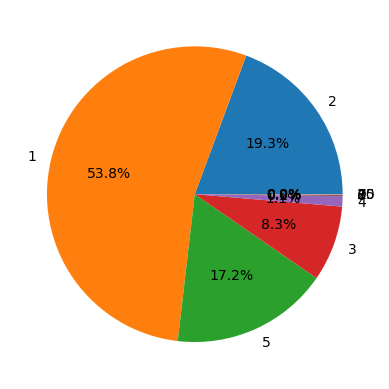

In [214]:
family_size = df_joined.groupby("CNT_FAM_MEMBERS").count()

fig, ax = plt.subplots()
ax.pie(family_size["ID"], labels=df_joined["CNT_FAM_MEMBERS"].unique().astype(int), autopct="%1.1f%%")

ax

## Credit Status Visualization

Pie chart yang satu ini digunakan untuk melihat distribusi status pembayaran kartu kredit nasabah selama 6 bulan terkahir. Dari chart tersebut, dapat dilihat bahwa hampir 1/3 dari tagihan kartu kredit selama 6 bulan berakhir dengan pembayaran yang telat atau belum dibayar. Mayoritas tagihan justru berada dalam grup yang tidak memiliki tagihan sama sekali, yaitu hampir setengahnya.

<Axes: >

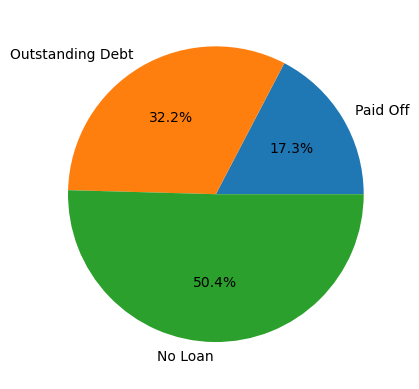

In [215]:
pie_data = df_joined.groupby("STATUS").count()

fig, ax = plt.subplots()
ax.pie(pie_data["ID"], labels=df_joined["STATUS"].unique(), autopct="%1.1f%%")

ax

## Credit Status Trend

Multi line chart ini digunakan melihat bagaimana trend status pembayaran kartu kredit berdasarkan kategori selama 6 bulan terakhir. Dapat diamati bahwa trend ini cukup stabil dengan sedikit fluktuasi. Artinya, secara keseluruhan jumalah status pembayaran berdasarkan kategori status cukup konsisten. Hal yang paling signifikan dalam chart ini adalah kenaikan jumlah status Paid Off dan penurunan Outstanding Debt, yang artinya pada bulan terkahir data ini, lebih banyak orang yang membayar tepat waktu.

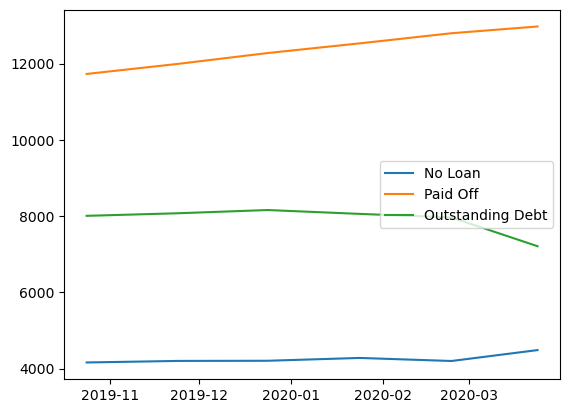

In [216]:
line_status_no_loan = df_joined[["MONTHS_BALANCE", "STATUS"]][df_joined["STATUS"] == "No Loan"].groupby("MONTHS_BALANCE", as_index=False).count()
line_status_paid = df_joined[["MONTHS_BALANCE", "STATUS"]][df_joined["STATUS"] == "Paid Off"].groupby("MONTHS_BALANCE", as_index=False).count()
line_status_outstanding = df_joined[["MONTHS_BALANCE", "STATUS"]][df_joined["STATUS"] == "Outstanding Debt"].groupby("MONTHS_BALANCE", as_index=False).count()

plt.plot(line_status_no_loan["MONTHS_BALANCE"], line_status_no_loan["STATUS"], label="No Loan")
plt.plot(line_status_no_loan["MONTHS_BALANCE"], line_status_paid["STATUS"], label="Paid Off")
plt.plot(line_status_no_loan["MONTHS_BALANCE"], line_status_outstanding["STATUS"], label="Outstanding Debt")

plt.legend()
plt.show()

## Average Income by Occupation

Bar chart di bawah ini menunjukan rata rata penghasilan nasabah berdasarkan tipe perkerjaan mereka. Dapat diamati bahwa tipe perkejaan dengan rata rata penghasilan paling rendah adalah pekerja tingkat rendah, lalu staff masak, dan staff kebersihan. Untuk pendapat rata rata paling besar, terdapat pada tipe perkejaan agen real estates dan juga manager. Kedua tipe perkerjaan ini juga memiliki rata rata yang cukup jauh dari tipe sebelumnya.

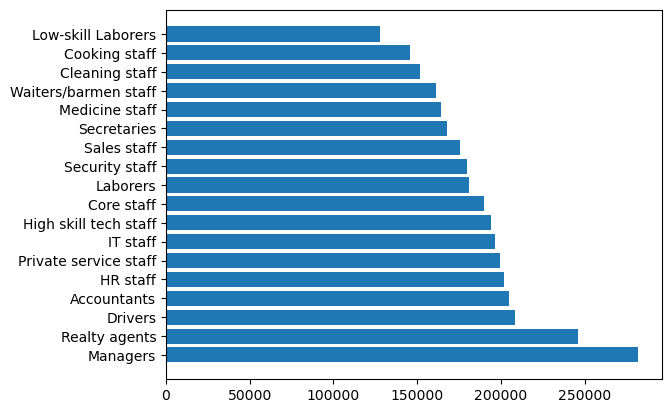

In [217]:
filtered = df_application_record[(df_application_record["OCCUPATION_TYPE"] != "Unknown") & (df_application_record["OCCUPATION_TYPE"] != "Unemployed")].sort_values("AMT_INCOME_TOTAL", ascending=False)

income = filtered[["OCCUPATION_TYPE", "AMT_INCOME_TOTAL"]].groupby("OCCUPATION_TYPE", as_index=False).mean().sort_values("AMT_INCOME_TOTAL", ascending=False)

plt.barh(income["OCCUPATION_TYPE"], income["AMT_INCOME_TOTAL"])
plt.show()

## Data Distribution on Income

Pada bagian ini, dilakukan analisis statistik deskriptif untuk mengetahui karakteristik distribusi dari data penghasilan nasabah. Chart yang digunakan untuk analisis ini adalah boxplot dan juga histogram. Berdasarkan chart boxplot, bisa diobservasi bahwa mayoritas dari penghasilan berada dalam angka yang kecil. Namun, ada cukup banyak nasabah yang memiliki penghasilan jauh di atas mayoritas, yang mengakibatkan adanya data yang sangat ekstrim. Hal ini juga didukung melalui visualisasi melalui histogram dan perhitungan central tendency. Data histogram juga menunjukan bahwa mayoritas nasabah hanya memiliki penghasilan di angka 20000. Selain itu, mean dan median distribusi ini juga tidak jauh dari angka 20000 itu.

Dapat disimpulkan bahwa distribusi data ini memiliki bentuk yang mirip dengan distribusi normal, namun memiliki skewness yang tinggi karena banyaknya data data di luar mayoritas yang ekstrim.

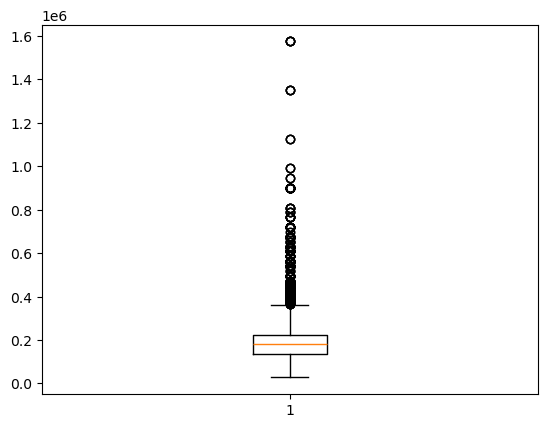

In [218]:
filtered = df_application_record[(df_application_record["OCCUPATION_TYPE"] != "Unknown") & (df_application_record["OCCUPATION_TYPE"] != "Unemployed")]

plt.boxplot(filtered["AMT_INCOME_TOTAL"])
plt.show()

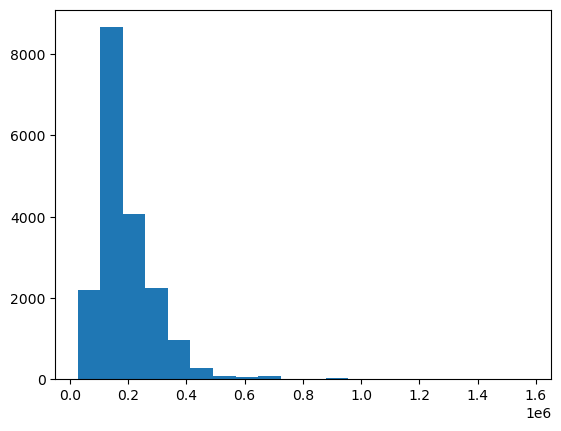

In [219]:
plt.hist(filtered["AMT_INCOME_TOTAL"], bins=20)
plt.show()

In [220]:
mean = filtered["AMT_INCOME_TOTAL"].mean()
median = filtered["AMT_INCOME_TOTAL"].median()
mode = filtered["AMT_INCOME_TOTAL"].mode()[0]

print(f"Mean data penghasilan: {mean:.2f}")
print(f"Median data penghasilan: {median:.2f}")
print(f"Modus data penghasilan: {mode:.2f}")

Mean data penghasilan: 195363.64
Median data penghasilan: 180000.00
Modus data penghasilan: 135000.00


## Correlation on Customer Background to Credit Status

Korelasi ini dilakukan untuk melakukan analisis inferensial terhadap hubungan antara atribut atribut latar belakang nasabah dan juga ketepatan mereka dalam membayar kartu kredit. Untuk analisis ini, dilakukan dengan menggunakan korelasi Kendall, mengingat bahwa status pembayaran merupakan data categorial. Analisis ini menggunakan atribut latar belakang nasabah yang berupa tipe rumah, level pendidikan, jumlah anggota keluarga, tipe pekerjaan, dan penghasilan. Untuk tipe pekerjaan dan penghasilan, data yang diambil hanya nasabah yang memiliki pekerjaan, i.e. tidak memiliki status "Unemployed".

Dari analisis ini, dapat dilihat bahwa semua atribut latar belakang nasabah sama sekali tidak memiliki korelasi terhadap ketepatan pembayaran kartu kredit. Semua korelasi berujung di coefficient yang mendekati nilai 0. Dari itu, bahwa disimpulkan bahwa latar belakang nasabah tidak menentukan ketepatan mereka dalam membayar tagihan kartu kredit.

In [221]:
print(f"Correlation coefficient antara type rumah dan status pembayaran: {stats.kendalltau(df_joined["NAME_HOUSING_TYPE"], df_joined["STATUS"])[0]}")
print(f"Correlation coefficient antara level edukasi dan status pembayaran: {stats.kendalltau(df_joined["NAME_EDUCATION_TYPE"], df_joined["STATUS"])[0]}")
print(f"Correlation coefficient antara jumlah keluarga dan status pembayaran: {stats.kendalltau(df_joined["CNT_FAM_MEMBERS"], df_joined["STATUS"])[0]}")

filtered = df_joined[(df_joined["OCCUPATION_TYPE"] != "Unemployed")]
print(f"Correlation coefficient antara type pekerjaan dan status pembayaran: {stats.kendalltau(filtered["OCCUPATION_TYPE"], filtered["STATUS"])[0]}")
print(f"Correlation coefficient antara penghasilan dan status pembayaran: {stats.kendalltau(filtered["AMT_INCOME_TOTAL"], filtered["STATUS"])[0]}")

Correlation coefficient antara type rumah dan status pembayaran: -0.0045098517213269605
Correlation coefficient antara level edukasi dan status pembayaran: -0.0016664829016259138
Correlation coefficient antara jumlah keluarga dan status pembayaran: -0.0003280920702913462
Correlation coefficient antara type pekerjaan dan status pembayaran: 0.014482488004037126
Correlation coefficient antara penghasilan dan status pembayaran: -0.014521860032999098


# Conclusion

Dari keseluruhan visualisasi dan analisis ini, ada beberapa poin utama yang bisa disampaikan. Pertama, jumlah pembayaran yang telat berada di sekitar 1/3. Artinya, kita masih perlu waktu untuk mengatasi masalah ini agar mencapai target pembayaran yang telat di 10%. Poin kedua, mayoritas nasabah memiliki penghasilan yang sangat bervariasi, meski begitu, mayoritas nasabah memiliki penghasilan yang cukup rendah. Poin ketiga, analisis ini tidak dapat digunakan untuk menemukan dan meminimalisir angka pembayaran kartu kredit yang tidak tepat dikarenakan tidak ditemukannya korelasi yang pasti antara latar belakang nasabah dengan ketepatan pembayaran merekan. Untuk itu, diperlukannya data yang lebih banyak atau metode analisis yang berbeda untuk menentukan cara yang terbaik untuk meminimalisir tidak tepatnya pembayaran kartu kredit.

# Dashboard

https://public.tableau.com/app/profile/muhammad.irfan.hilmi3140/viz/P0M1_Irfan_Hilmi/DataVisualizationDashboard?publish=yes